Load data

In [1]:
import pandas as pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.impute import SimpleImputer, KNNImputer


print(f"version sklearn: {sklearn.__version__} ")

version sklearn: 1.5.2 


In [41]:
df= sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [42]:
df.shape

(891, 15)

In [43]:
#dropna
#On supprime beaucoup de données
df.dropna().shape

(182, 15)

In [49]:
df.dropna(axis=0)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


<Axes: >

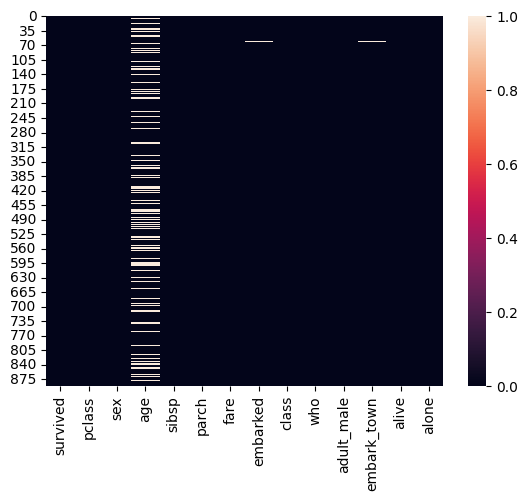

In [50]:
sns.heatmap(df.isna())

La colonne deck est principalement composée de vides

In [15]:
na_index = df[df.isna().any(axis=1)].index

Eliminer les NaN avec Dropna

In [46]:
# eliminer la colonne deck
df.drop(labels="deck",axis=1, inplace=True)

In [56]:
df.dropna(axis=0, thresh=200, inplace=True)
df.dropna(axis=1, thresh=200, inplace=True)
#df.dropna(axis=0, subset=["age"], inplace=True)

IMPUTER

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.impute import SimpleImputer, KNNImputer


print(f"version sklearn: {sklearn.__version__} ")

version sklearn: 1.5.2 


In [6]:
df=sns.load_dataset("mpg")

In [59]:
df[df.isna().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [33]:
na_index = df[df.isna().any(axis=1)].index

SimpleImputer

In [20]:
Imputer = SimpleImputer(strategy="most_frequent")

Imputer.fit(df)
pd.DataFrame(Imputer.transform(df), columns=df.columns).iloc[na_index, :]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,150.0,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,150.0,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,150.0,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,150.0,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,150.0,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,150.0,3035,20.5,82,usa,amc concord dl


In [23]:
df_numeric = df.select_dtypes(include="number")
df_numeric

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [34]:
Imputer = SimpleImputer(strategy="mean")

Imputer.fit(df_numeric)
pd.DataFrame(Imputer.transform(df_numeric), columns=df_numeric.columns).iloc[na_index, :]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
32,25.0,4.0,98.0,104.469388,2046.0,19.0,71.0
126,21.0,6.0,200.0,104.469388,2875.0,17.0,74.0
330,40.9,4.0,85.0,104.469388,1835.0,17.3,80.0
336,23.6,4.0,140.0,104.469388,2905.0,14.3,80.0
354,34.5,4.0,100.0,104.469388,2320.0,15.8,81.0
374,23.0,4.0,151.0,104.469388,3035.0,20.5,82.0


KNNImputer

In [37]:
Imputer = KNNImputer(n_neighbors=5)
Imputer.fit(df_numeric)
pd.DataFrame(Imputer.transform(df_numeric), columns=df_numeric.columns).iloc[na_index, :]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
32,25.0,4.0,98.0,62.0,2046.0,19.0,71.0
126,21.0,6.0,200.0,107.6,2875.0,17.0,74.0
330,40.9,4.0,85.0,64.6,1835.0,17.3,80.0
336,23.6,4.0,140.0,112.8,2905.0,14.3,80.0
354,34.5,4.0,100.0,76.0,2320.0,15.8,81.0
374,23.0,4.0,151.0,88.2,3035.0,20.5,82.0


FEATURE SELECTION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.datasets import make_regression

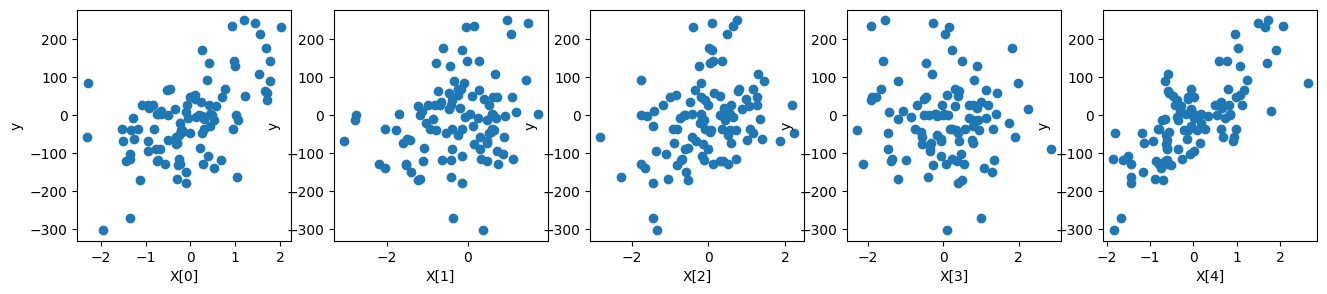

In [24]:
X,y = make_regression(n_samples=100, n_features=5, random_state=7)


fig,ax = plt.subplots(1, 5,figsize=(16,3))
for i in range(5):
    ax[i].scatter(X[:, i], y)
    ax[i].set_xlabel(f"X[{i}]")
    ax[i].set_ylabel("y")



In [28]:
feature_selector = SelectKBest(score_func=f_regression, k=2)
feature_selector.fit(X,y)

feature_selector.get_feature_names_out()

array(['x0', 'x4'], dtype=object)